In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from astropy.table import Table
from galpy.util.multi import parallel_map
from galpy.df import quasiisothermaldf
from galpy.potential import MWPotential2014
from galpy.actionAngle import actionAngleStaeckel

# Set up QDF object
aA = actionAngleStaeckel(pot=MWPotential2014, c=True, delta=0.45)
qdf = quasiisothermaldf(1./3., 0.15, 0.075, 1., 1., pot=MWPotential2014, aA=aA, cutcounter=True)

In [2]:
def pz(z):
    result = integrate.quad(lambda R: qdf.density(R, z), 3/8., 13/8., epsabs=0.01, epsrel=0.01)
    print('Completed integration at z =', z)
    return result[0]

def pR(R):
    result = integrate.quad(lambda z: qdf.density(R, z), -0.25, 0.25, epsabs=0.01, epsrel=0.01)
    print('Completed integration at R =', R)
    return result[0]

R = np.linspace(3./8., 13./8., 50)
z = np.linspace(-0.25, 0.25, 50)
pRs = list(parallel_map(pR, R, numcores=5))
pzs = list(parallel_map(pz, z, numcores=5))

Completed integration at R = 1.3954081632653061
Completed integration at R = 1.1403061224489797
Completed integration at R = 0.8852040816326531
Completed integration at R = 0.6301020408163265
Completed integration at R = 0.375
Completed integration at R = 1.4209183673469388
Completed integration at R = 1.1658163265306123
Completed integration at R = 0.9107142857142857
Completed integration at R = 0.6556122448979592
Completed integration at R = 0.4005102040816326
Completed integration at R = 1.4464285714285714
Completed integration at R = 1.191326530612245
Completed integration at R = 0.9362244897959184
Completed integration at R = 0.6811224489795918
Completed integration at R = 0.4260204081632653
Completed integration at R = 1.471938775510204
Completed integration at R = 1.2168367346938775
Completed integration at R = 0.9617346938775511
Completed integration at R = 0.7066326530612245
Completed integration at R = 0.451530612244898
Completed integration at R = 1.4974489795918369
Complete

In [3]:
def pvT(vT):
    result = integrate.dblquad(lambda z, R: qdf.pvT(vT, R, z), 3./8., 13./8., 
                               lambda R: -0.25, lambda R: 0.25, epsabs=0.01, epsrel=0.01)
    print("Completed integration at vT =", vT)
    return result[0]

vT = np.linspace(0, 1.5, 50)
pvts = list(parallel_map(pvT, vT, numcores=5))

/home/mwbub/repos/galpy/galpy/df/quasiisothermaldf.py:269: RuntimeWarning: divide by zero encountered in log
  -kappa*jr*numpy.exp(-2.*lnsr)

Completed integration at vT = 0.0
Completed integration at vT = 1.2244897959183674
Completed integration at vT = 0.9183673469387755
Completed integration at vT = 0.6122448979591837
Completed integration at vT = 0.30612244897959184
Completed integration at vT = 0.030612244897959183
Completed integration at vT = 1.2551020408163265
Completed integration at vT = 0.9489795918367346
Completed integration at vT = 0.6428571428571428
Completed integration at vT = 0.336734693877551
Completed integration at vT = 0.061224489795918366
Completed integration at vT = 1.2857142857142856
Completed integration at vT = 0.9795918367346939
Completed integration at vT = 0.673469387755102
Completed integration at vT = 0.36734693877551017
Completed integration at vT = 0.09183673469387754
Completed integration at vT = 1.010204081632653
Completed integration at vT = 1.3163

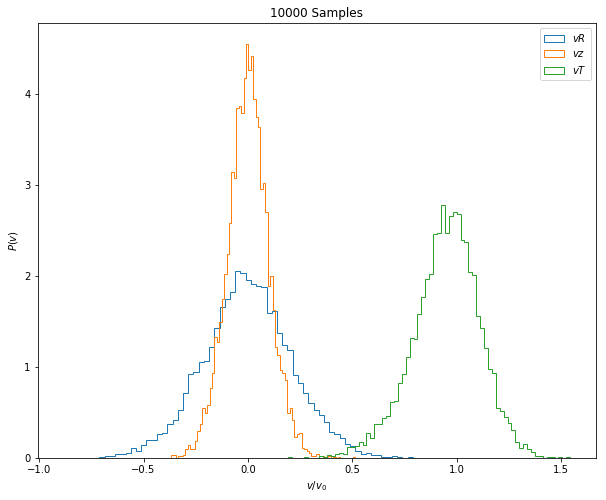

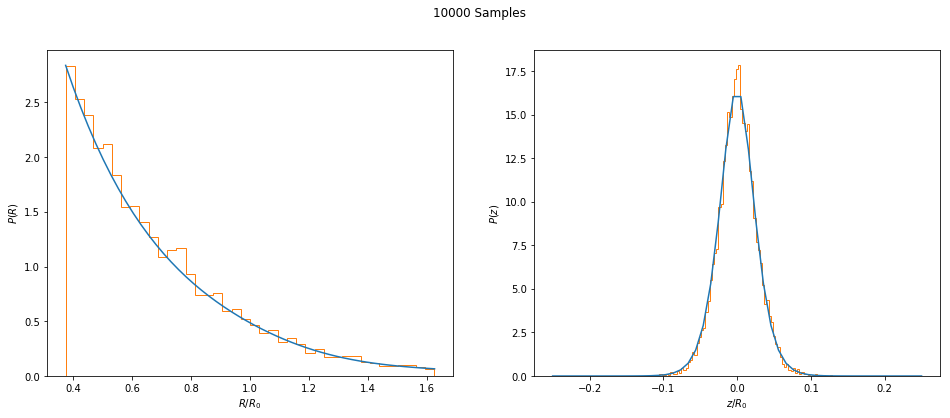

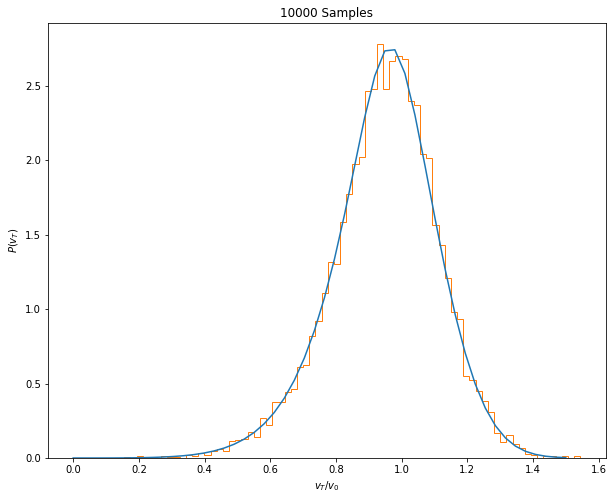

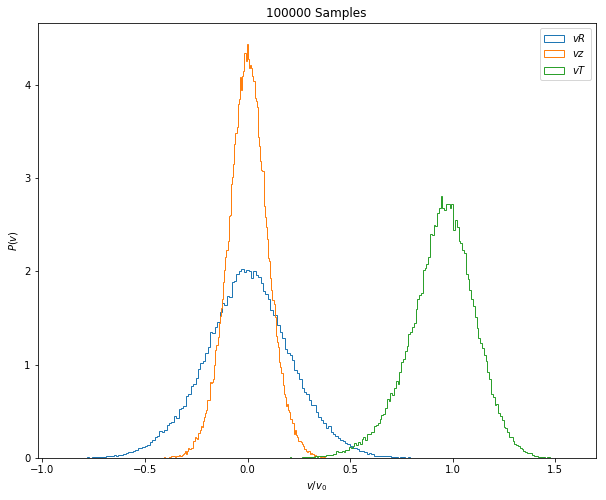

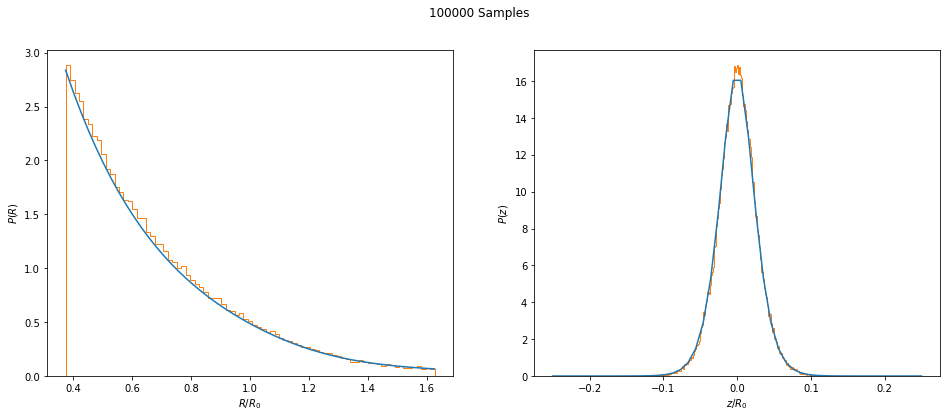

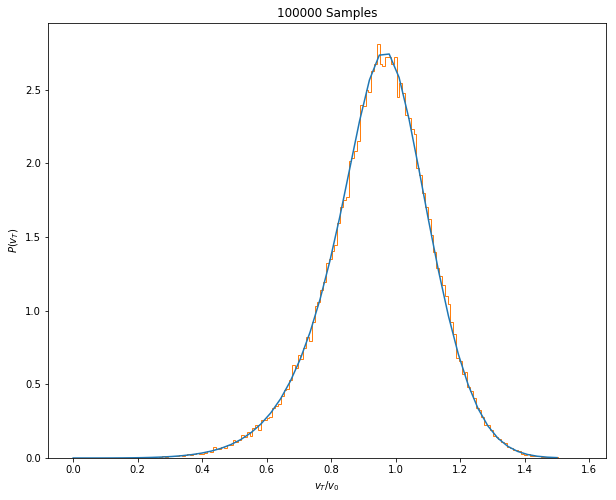

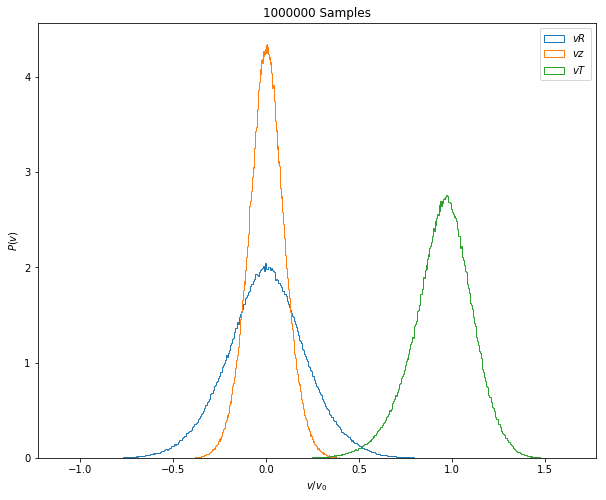

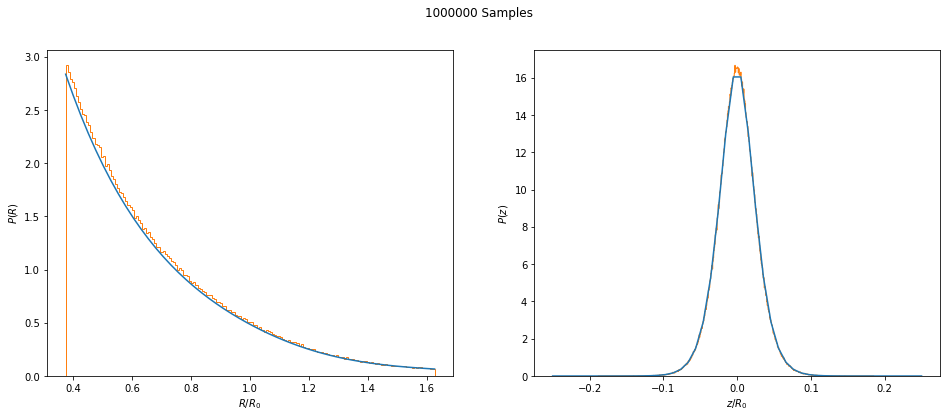

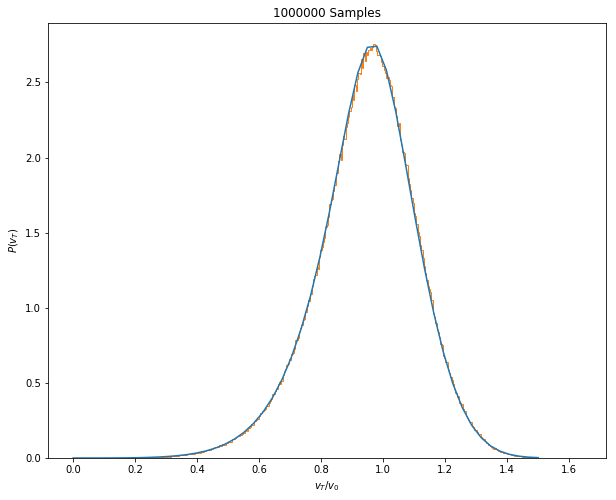

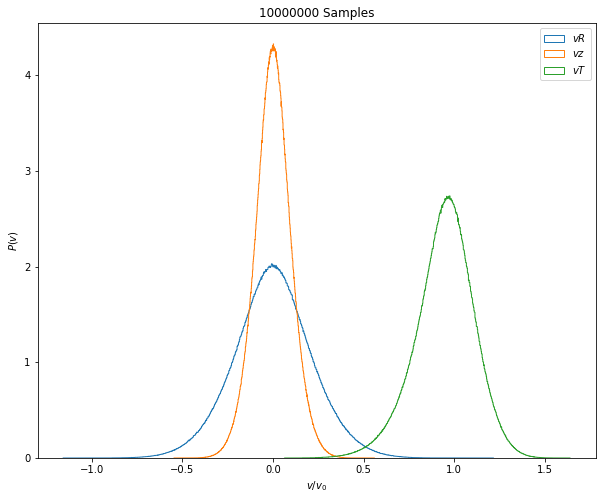

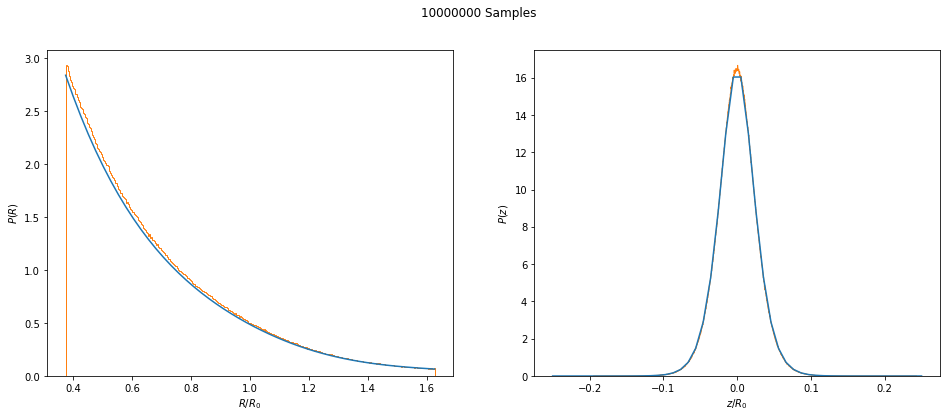

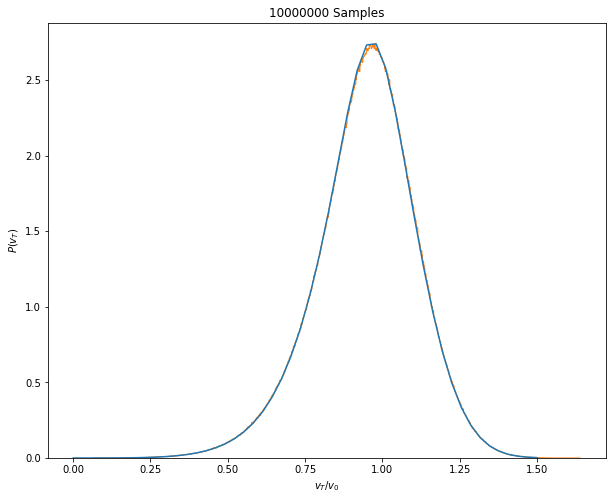

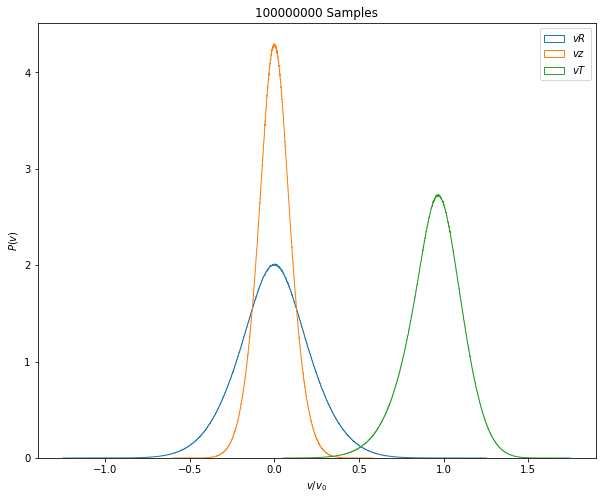

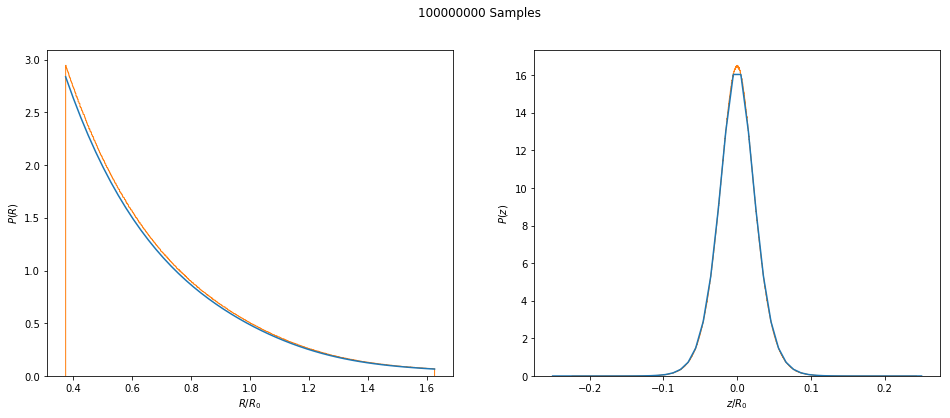

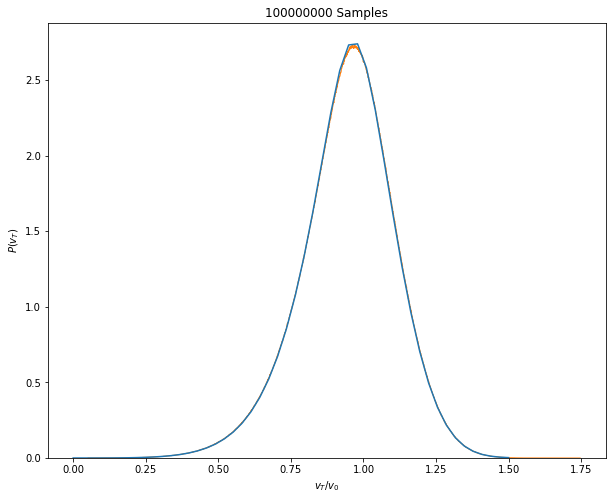

In [4]:
sample_sizes = [10000, 100000, 1000000, 10000000, 100000000]
DATADIR = '/geir_data/scr/mwbub/data/qdf_samples/'
for sample_size in sample_sizes:
    data = Table.read(DATADIR + '{}_samples.fits'.format(sample_size), format='fits')
    
    plt.figure(figsize=(10,8))
    plt.hist(data['vR'], normed=True, histtype='step', bins='auto', label='$vR$')
    plt.hist(data['vz'], normed=True, histtype='step', bins='auto', label='$vz$')
    plt.hist(data['vT'], normed=True, histtype='step', bins='auto', label='$vT$')
    plt.xlabel('$v/v_0$')
    plt.ylabel('$P(v)$')
    plt.title('{} Samples'.format(sample_size))
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    ax[0].plot(R, pRs/(np.sum(pRs) * (R[1] - R[0])))
    ax[0].hist(data['R'], normed=True, histtype='step', bins='auto')
    ax[0].set_xlabel('$R/R_0$')
    ax[0].set_ylabel('$P(R)$')
    ax[1].plot(z, pzs/(np.sum(pzs) * (z[1] - z[0])))
    ax[1].hist(data['z'], normed=True, histtype='step', bins='auto')
    ax[1].set_xlabel('$z/R_0$')
    ax[1].set_ylabel('$P(z)$')
    fig.suptitle('{} Samples'.format(sample_size))
    plt.show()
    
    plt.figure(figsize=(10,8))
    plt.plot(vT, pvts/(np.sum(pvts) * (vT[1] - vT[0])))
    plt.hist(data['vT'], normed=True, histtype='step', bins='auto', label='$vT$')
    plt.xlabel('$v_T/v_0$')
    plt.ylabel('$P(v_T)$')
    plt.title('{} Samples'.format(sample_size))
    plt.show()